<a href="https://colab.research.google.com/github/Pontes-y/fiap/blob/main/fiap_ano2_fase_07_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

In [ ]:
# Carregando uma amostra dos dados dos arquivos CSV
usuarios_df = pd.read_csv('BX-Users.csv', encoding='ISO-8859-1').sample(frac=0.001, random_state=1)

livros_df = pd.read_csv('BX-Books.csv', encoding='ISO-8859-1').sample(frac=0.001, random_state=1)

avaliacoes_df = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='ISO-8859-1').sample(frac=0.001, random_state=1)

In [111]:
# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando nós para usuários com idade como atributo
for index, row in usuarios_df.iterrows():
    G.add_node(row['User-ID'], idade=row['Age'])

# Adicionando nós para livros
for index, row in livros_df.iterrows():
    G.add_node(row['ISBN'], titulo=row['Book-Title'], autor=row['Book-Author'])

# Adicionando arestas com avaliações
for index, row in avaliacoes_df.iterrows():
    G.add_edge(row['User-ID'], row['ISBN'], avaliacao=row['Book-Rating'])

In [112]:
# Calculando grafo
pos = nx.spring_layout(G)

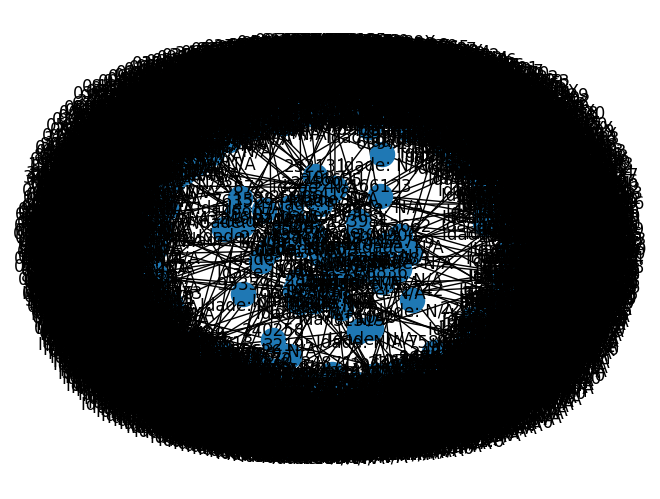

In [113]:
# Visualizando o grafo
labels = {node: f"{node}\nIdade: {G.nodes[node].get('idade', 'N/A')}" for node in G.nodes}
nx.draw(G, pos, with_labels=True, labels=labels)
plt.show()